In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Process variables .. find T2
T1 = 400.0 # K
P1 = 1.0 # bar
P2 = 5.0 # bar

In [4]:
# Coefficients of temperature dependent heat capacity of propane
A = 1.213 # 
B = 28.785e-3 # K^-1
C = -8.824e-6 # K^-2
D = 0.0 # K^2

In [23]:
def C_p_ig_S(T0, T, A, B, C, D):
  # Calculate the effective heat capacity
  # C_p_ig / R = A + (B*T0 + (C*T0**2 + D/(tau**2*T0**2))*((tau+1)/2))*((tau-1)/ln(tau))
  #
  # Parameters
  # -----------
  # T0 : float
  #   starting temperature
  # T1 : float
  #   final temperature
  # A : float
  #   zero-order heat capacity coefficient
  # B : float
  #   first-order heat capacity coefficient
  # C : float
  #   second-order heat capacity coefficient
  # D : float
  #   negative second-order heat capacity coefficient
  #
  # Returns
  # -------
  # retval : float
  #   effective heat capacity divided by R (universal gas constant)
  tau = T/T0
  return A + (B*T0 + (C*T0**2 + D/(tau**2*T0**2))*((tau+1)/2))*((tau-1)/np.log(tau))

In [30]:
C_p_ig_S(298.15, 298.16, A, B, C, D)

9.010969805152403

In [25]:
def func(T):
  return T - T1*np.exp(np.log(P2/P1)/C_p_ig_S(T1, T, A, B, C, D))

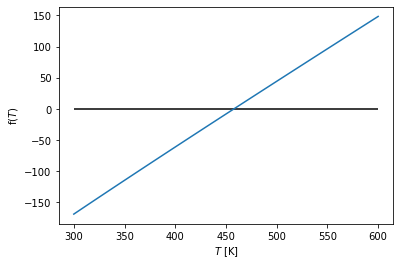

In [26]:
T = np.linspace(300, 600)
f_T = func(T)
plt.plot(T, f_T)
plt.xlabel("$T$ [K]")
plt.ylabel("f($T$)")
plt.hlines(0, 300, 600)

In [27]:
from scipy.optimize import fsolve
T0 = 450 # K
c = fsolve(func, T0)
print("The final temperature is {} K".format(c))

The final temperature is [457.82553636] K
